In [1]:
import pandas as pd

## 一、讀取想要回測的股池

In [2]:
df = pd.read_pickle('台灣高股息指數.pkl')
df.head(2)

Index,1101,1102,1301,1303,1304,1314,1326,1402,1434,1477,...,8008,8046,8078,8150,8422,9904,9907,9917,9933,9945
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,0.0004,NaN,NaN,NaN,0.0003,NaN,NaN,NaN,...,0.0023,0.0004,0.0007,NaN,NaN,NaN,0.0022,NaN,0.0016,NaN
2010-01-05,NaN,NaN,0.0004,NaN,NaN,NaN,0.0003,NaN,NaN,NaN,...,0.0023,0.0004,0.0007,NaN,NaN,NaN,0.0022,NaN,0.0016,NaN


##### 根據個股是否存在股池內，更改成布林值

In [3]:
pool = df.notna()
pool.head(2)

Index,1101,1102,1301,1303,1304,1314,1326,1402,1434,1477,...,8008,8046,8078,8150,8422,9904,9907,9917,9933,9945
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,False,False,True,False,False,False,True,False,False,False,...,True,True,True,False,False,False,True,False,True,False
2010-01-05,False,False,True,False,False,False,True,False,False,False,...,True,True,True,False,False,False,True,False,True,False


## 二、讀取想要的因子

In [4]:
df3 = pd.read_pickle('Market_Value.pkl')
df4 = pd.read_pickle('Stock_Dividend_Rate.pkl')

In [5]:
df3.head(2)

Index,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,112921.0,103157.0,13208.0,11111.0,3654.0,4483.0,6635.0,21735.0,5624.0,16512.0,...,2404.0,32764.0,928.0,1474.0,804.0,2483.0,6653.0,1684.0,721.0,1188.0
2010-01-05,116872.0,105396.0,13137.0,10930.0,3626.0,4504.0,6692.0,21760.0,5613.0,16536.0,...,2354.0,32802.0,924.0,1469.0,810.0,2419.0,6569.0,1612.0,726.0,1173.0


In [6]:
df4.head(2)

Index,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,3.85,5.06,0.0,0.0,0.0,1.88,0.0,0.0,1.86,3.26,...,0.76,0.93,0.0,1.41,4.64,0.0,1.65,0.0,1.95,0.0
2010-01-05,3.72,4.95,0.0,0.0,0.0,1.87,0.0,0.0,1.86,3.26,...,0.77,0.93,0.0,1.42,4.60,0.0,1.67,0.0,1.93,0.0


##### 將想要的因子配合股池的樣子，如果不存在股池(pool)內的話，就全部刪掉(不然也沒用)

In [7]:
## 將因子的資料以pool為基準進行刪除
Market_Value = df3[pool].dropna(axis=1,how='all')  
Stock_Dividend_Rate = df4[pool].dropna(axis=1,how='all')    

In [8]:
Market_Value.tail(2)

Index,1101,1102,1301,1303,1304,1314,1326,1402,1434,1477,...,6285,6669,8046,8150,8422,9904,9907,9917,9933,9945
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-28,NaN,146296.0,507986.0,531365.0,NaN,NaN,NaN,168080.0,NaN,84771.0,...,76873.0,NaN,160249.0,NaN,NaN,NaN,NaN,52564.0,NaN,NaN
2023-12-29,NaN,147005.0,504167.0,527400.0,NaN,NaN,NaN,167010.0,NaN,85738.0,...,77131.0,NaN,162511.0,NaN,NaN,NaN,NaN,52790.0,NaN,NaN


In [9]:
Stock_Dividend_Rate.tail(2)

Index,1101,1102,1301,1303,1304,1314,1326,1402,1434,1477,...,6285,6669,8046,8150,8422,9904,9907,9917,9933,9945
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-28,NaN,5.5748,5.2632,4.4776,NaN,NaN,NaN,4.2994,NaN,4.1370,...,2.6323,NaN,7.2581,NaN,NaN,NaN,NaN,4.2918,NaN,NaN
2023-12-29,NaN,5.5479,5.3030,4.5113,NaN,NaN,NaN,4.3269,NaN,4.0903,...,2.6235,NaN,7.1571,NaN,NaN,NaN,NaN,4.2735,NaN,NaN


## 三、讀取報酬率

In [10]:
dff = pd.read_pickle('Stock_Return.pkl')
dff.head(2)

Index,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.8824,-0.1445,1.6575,5.1429,0.8939,1.4286,2.2026,-1.4908,-0.5825,-0.4261,...,1.7308,1.2911,-1.1194,-0.6098,1.1204,0.7599,2.2508,4.4898,-3.6789,-0.6135
2010-01-05,3.4985,2.1708,-0.5435,-1.6304,-0.7752,0.4695,0.8621,0.1164,-0.1953,0.1427,...,-2.0794,0.1159,-0.3774,-0.3067,0.8310,-2.5641,-1.2579,-4.2969,0.6944,-1.2346


##### 將會用到的報酬率配合股池的樣子，如果不存在股池(pool)內的話，就全部刪掉(不然也沒用)

In [11]:
Expexct_Stock_Return =dff[pool].dropna(axis = 1 , how ='all')     ## 將報酬率的資料以pool為基準進行刪除
Expexct_Stock_Return.head(2)

Index,1101,1102,1301,1303,1304,1314,1326,1402,1434,1477,...,6285,6669,8046,8150,8422,9904,9907,9917,9933,9945
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,-0.4458,NaN,NaN,NaN,-0.7205,NaN,NaN,NaN,...,NaN,NaN,0.4082,NaN,NaN,NaN,2.4490,NaN,-0.3049,NaN
2010-01-05,NaN,NaN,1.1940,NaN,NaN,NaN,1.0160,NaN,NaN,NaN,...,NaN,NaN,6.0976,NaN,NaN,NaN,-0.3984,NaN,0.0000,NaN


## 三、設定條件，也就是達成某些條件後，才進行買進或放空。

##### 1. 這裡要根據因子的經濟意義來思考，哪種條件比較符合直覺解釋

In [12]:
## 以下面為例，用市值、股利率進行排序，如果是股池整體30%以下的就買進；股池整體70%以上的就放空
MV_rank = Market_Value.rank(axis=1, pct=True, ascending=True)
Dividend_Rate_rank = Stock_Dividend_Rate.rank(axis=1, pct=True, ascending=True)

long_signal = (MV_rank > 0.3)  & (Dividend_Rate_rank < 0.3) 
short_signal = (MV_rank < 0.7) & (Dividend_Rate_rank > 0.7)
## 用布林值表示買進、放空訊號

In [13]:
long_signal.head(3)

Index,1101,1102,1301,1303,1304,1314,1326,1402,1434,1477,...,6285,6669,8046,8150,8422,9904,9907,9917,9933,9945
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2010-01-05,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2010-01-06,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
short_signal.head(3)

Index,1101,1102,1301,1303,1304,1314,1326,1402,1434,1477,...,6285,6669,8046,8150,8422,9904,9907,9917,9933,9945
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2010-01-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2010-01-06,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


##### 2.將Long、Short部位統一標準化，並對同一天的操作進行權重調整

In [15]:
Investing_Weight = (long_signal.astype(int)) + (short_signal.astype(int)*(-1))
Investing_Weight = Investing_Weight.div(Investing_Weight.abs().sum(axis=1), axis=0)
Investing_Weight
## 這樣就可以知道同一天，買進多少比例、放空多少比例了

Index,1101,1102,1301,1303,1304,1314,1326,1402,1434,1477,...,6285,6669,8046,8150,8422,9904,9907,9917,9933,9945
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.0,0.000000,0.090909,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.090909,0.0
2010-01-05,0.0,0.000000,0.090909,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.090909,0.0
2010-01-06,0.0,0.000000,0.090909,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.090909,0.0
2010-01-07,0.0,0.000000,0.090909,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.090909,0.0
2010-01-08,0.0,0.000000,0.090909,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.090909,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,0.0,-0.047619,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,-0.047619,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2023-12-26,0.0,-0.047619,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,-0.047619,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2023-12-27,0.0,-0.047619,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,-0.047619,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


## 四、計算每天預期報酬率

##### 1. Dataframe相乘，即「每天預期報酬率 = 投資比重 * 個股每天預期報酬」

In [16]:
Expexct_Daily_Return = Investing_Weight * Expexct_Stock_Return
#Expexct_Daily_Return = Expexct_Daily_Return.dropna(axis=0,how='all')
## 可以dropna掉一些沒有用到的數據，讓整體好看一點

In [17]:
Expexct_Daily_Return

Index,1101,1102,1301,1303,1304,1314,1326,1402,1434,1477,...,6285,6669,8046,8150,8422,9904,9907,9917,9933,9945
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,-0.040527,NaN,NaN,NaN,-0.065500,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,0.027718,NaN
2010-01-05,NaN,NaN,0.108545,NaN,NaN,NaN,0.092364,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,-0.0,NaN,-0.000000,NaN
2010-01-06,NaN,NaN,0.294982,NaN,NaN,NaN,0.613900,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,-0.000000,NaN
2010-01-07,NaN,NaN,0.000000,NaN,NaN,NaN,-0.073409,NaN,NaN,NaN,...,NaN,NaN,-0.000000,NaN,NaN,NaN,-0.0,NaN,0.041700,NaN
2010-01-08,NaN,NaN,0.077918,NaN,NaN,NaN,-0.209691,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,-0.502727,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,NaN,-0.059152,-0.000000,0.0,NaN,NaN,NaN,-0.0,NaN,-0.0,...,-0.0,NaN,-0.088733,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2023-12-26,NaN,-0.040900,0.000000,0.0,NaN,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,-0.029038,NaN,NaN,NaN,NaN,-0.0,NaN,NaN
2023-12-27,NaN,-0.000000,0.000000,0.0,NaN,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,-0.048100,NaN,NaN,NaN,NaN,0.0,NaN,NaN


<Axes: xlabel='Date'>

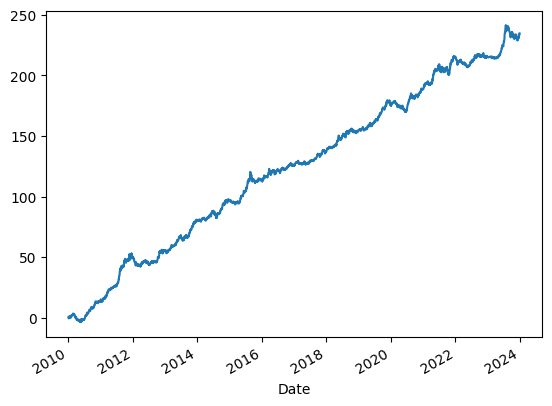

In [18]:
Expexct_Daily_Return.sum(axis=1).cumsum().plot()

## 五、引入Quantstats套件，再把dataframe的資料進行匯入

In [19]:
import quantstats as qs

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old

                           Strategy
-------------------------  -----------
Start Period               2010-01-04
End Period                 2023-12-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -100.0%
CAGR﹪                     -100.0%

Sharpe                     1.97
Prob. Sharpe Ratio         100.0%
Smart Sharpe               1.86
Sortino                    3.1
Smart Sortino              2.94
Sortino/√2                 2.19
Smart Sortino/√2           2.08
Omega                      1.39

Max Drawdown               -100.01%
Longest DD Days            5107
Volatility (ann.)          873.81%
Calmar                     -1.0
Skew                       0.14
Kurtosis                   1.63

Expected Daily %           -8.67%
Expected Monthly %         -84.39%
Expected Yearly %          -100.0%
Kelly Criterion            15.72%
Risk of Ruin               0.0%
Daily Value-at-Risk        -83.72%
Expected Shortfall (cVaR)  -83.72%

Max Consecuti

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2010-01-05,2010-11-03,2023-12-29,5107,-100.005997,-100.000232


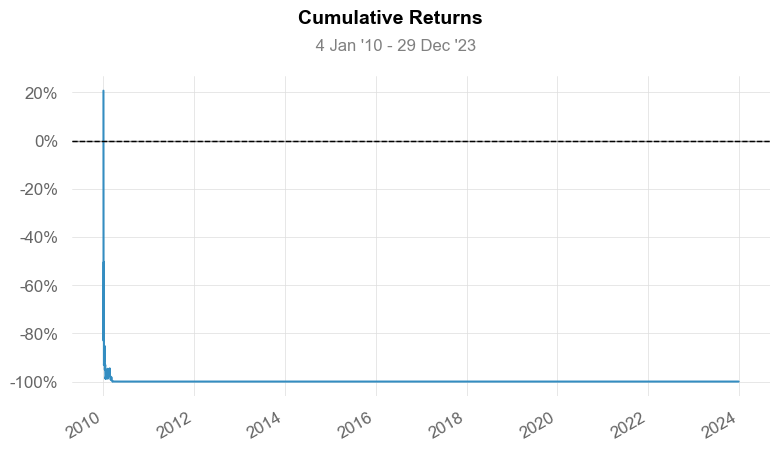

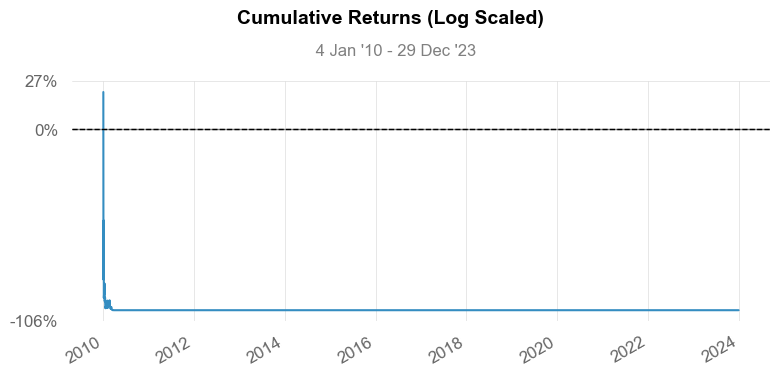

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


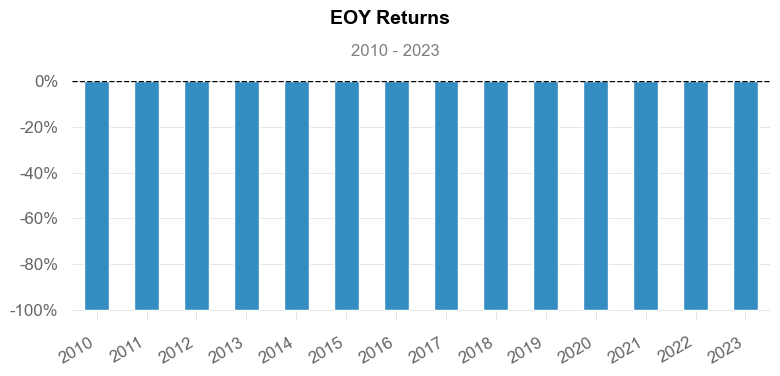

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()


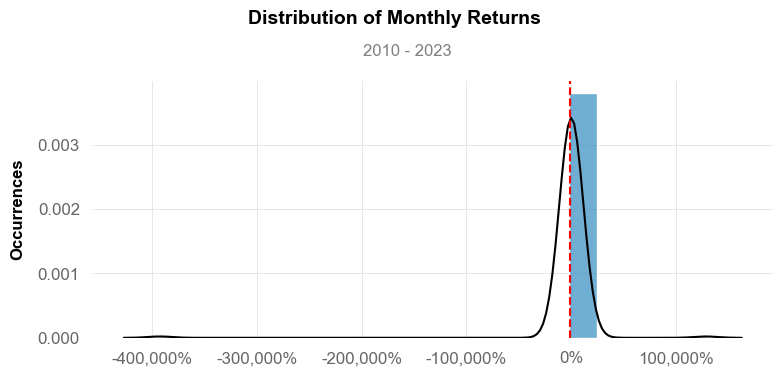

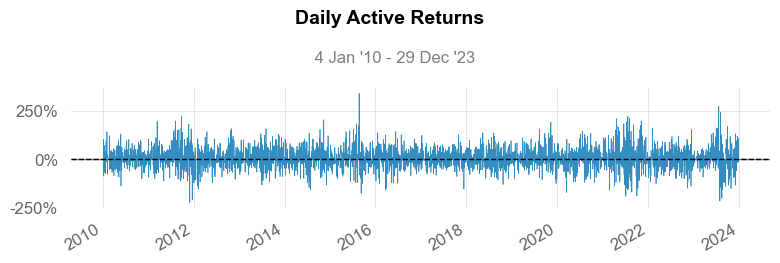

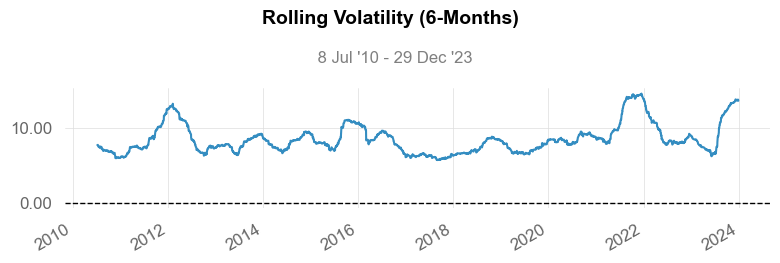

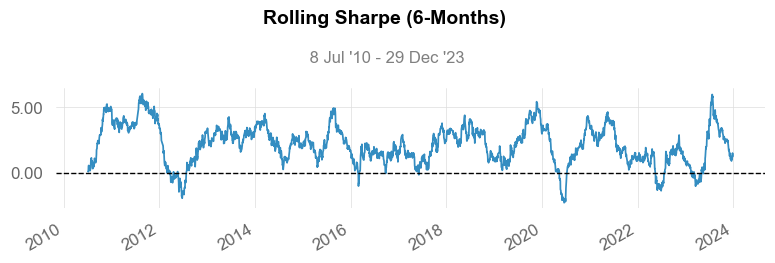

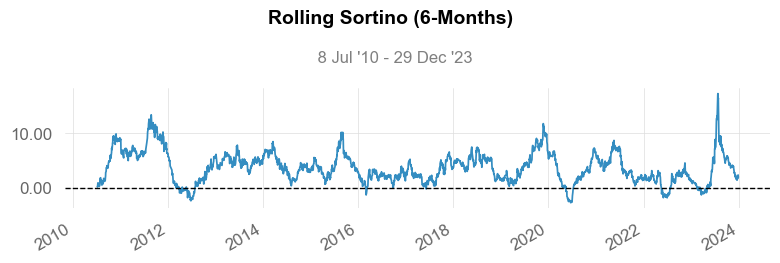

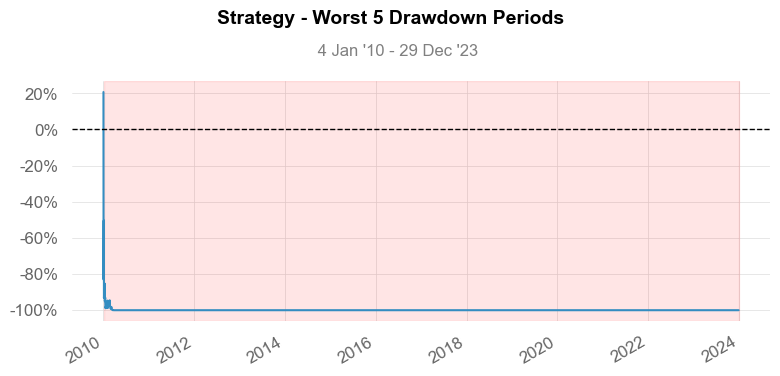

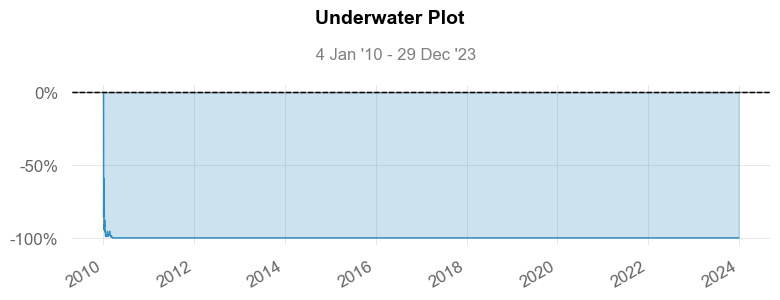

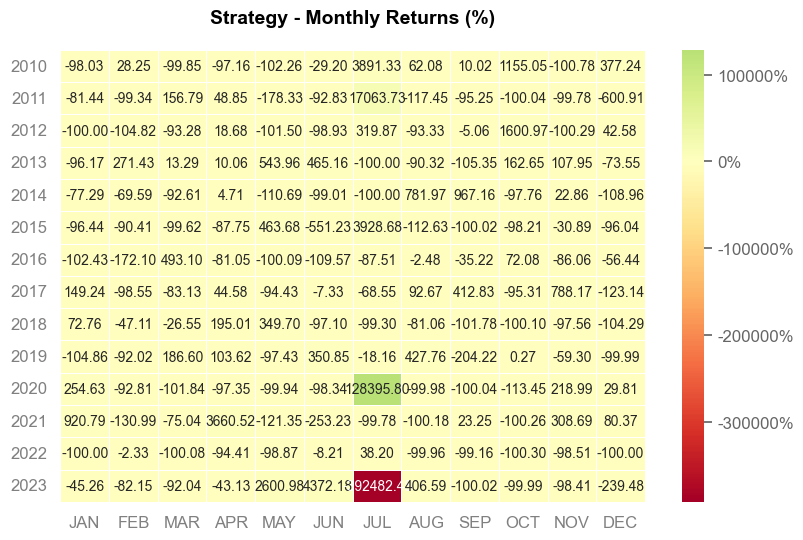

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:1016: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  port["Weekly"].ffill(inplace=True)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:1018: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  port["Monthly"] = port["Daily"].resample("M").apply(apply_fnc)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\q

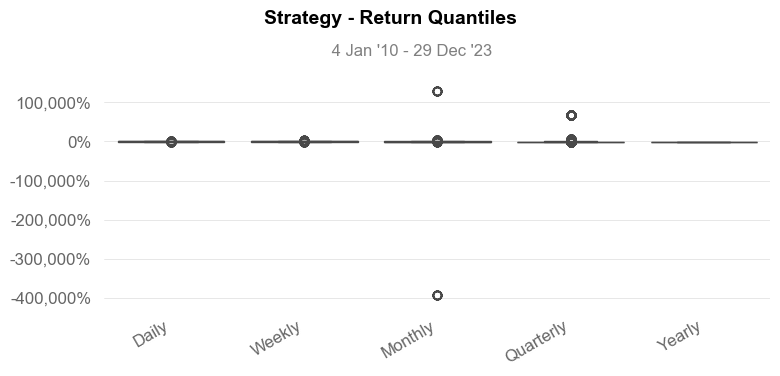

In [20]:
qs.reports.full(Expexct_Daily_Return.sum(axis=1))

In [21]:
qs.reports.html(Expexct_Daily_Return.sum(axis=1),output='Strategy_Second.html')

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old